In [1]:
import sklearn
import json
import operator
import matplotlib.pyplot as plt
import prettyplotlib as ppl
%matplotlib inline

/usr/local/lib/python3.4/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


In [2]:
agent1 = [sklearn.externals.joblib.load('agent1_consolidate')]
agent2 = [sklearn.externals.joblib.load('agent2_consolidate')]

In [3]:
def loader(dictionary):
    def load_keys(k):
        unjsoned = json.loads(k)
        loaded = tuple( ((tuple(unjsoned[0])), unjsoned[1] ))
        return loaded
    return {load_keys(k):v for k,v in dictionary.items()}
loaded1 = [loader(i) for i in agent1]
loaded2 = [loader(i) for i in agent2]
def get_winners(dictionary):
    states = set([k[0] for k,v in dictionary.items()])
    winners = {}
    for s in states:
        matches = [(v, k[1]) for k,v in dictionary.items() if k[0]==s]
        winners[s] = sorted(matches, key=operator.itemgetter(0))[::-1]
    return {k: v[0][1] for k,v in winners.items()}

In [22]:
loaded1[0]

{((0, 'pending', 'pending'), 'go_to_sleep'): 112.68411565756227,
 ((0, 'pending', 'running'), 'go_to_sleep'): 116.01397576554234,
 ((0, 'pending', 'sleeping'), 'go_to_sleep'): 134.923117941108,
 ((0, 'running', 'pending'), 'noop'): -66.2,
 ((0, 'running', 'pending'), 'prepare_sleep'): -16.516172401356,
 ((0, 'running', 'running'), 'noop'): -66.76888227231099,
 ((0, 'running', 'running'), 'prepare_sleep'): 21.06819420408069,
 ((0, 'running', 'sleeping'), 'noop'): -75.11836371677092,
 ((0, 'running', 'sleeping'), 'prepare_sleep'): 28.10815873555132,
 ((0, 'sleeping', 'pending'), 'noop'): 166.96236311027062,
 ((0, 'sleeping', 'pending'), 'wakeup'): -12.573728159446887,
 ((0, 'sleeping', 'running'), 'noop'): 228.51751015229064,
 ((0, 'sleeping', 'running'), 'wakeup'): 117.17781204155341,
 ((0, 'sleeping', 'sleeping'), 'noop'): 192.62763868709408,
 ((0, 'sleeping', 'sleeping'), 'wakeup'): 51.23238468050887,
 ((1, 'pending', 'pending'), 'go_to_sleep'): 141.23827431004938,
 ((1, 'pending', 'r

In [5]:
[get_winners(j) for j in loaded2]

[{(0, 'pending', 'pending'): 'go_to_sleep',
  (0, 'pending', 'running'): 'go_to_sleep',
  (0, 'pending', 'sleeping'): 'go_to_sleep',
  (0, 'running', 'pending'): 'prepare_sleep',
  (0, 'running', 'running'): 'prepare_sleep',
  (0, 'running', 'sleeping'): 'prepare_sleep',
  (0, 'sleeping', 'pending'): 'noop',
  (0, 'sleeping', 'running'): 'noop',
  (0, 'sleeping', 'sleeping'): 'noop',
  (1, 'pending', 'pending'): 'go_to_sleep',
  (1, 'pending', 'running'): 'go_to_sleep',
  (1, 'pending', 'sleeping'): 'go_to_sleep',
  (1, 'running', 'pending'): 'noop',
  (1, 'running', 'running'): 'prepare_sleep',
  (1, 'running', 'sleeping'): 'prepare_sleep',
  (1, 'sleeping', 'pending'): 'wakeup',
  (1, 'sleeping', 'running'): 'noop',
  (1, 'sleeping', 'sleeping'): 'wakeup',
  (2, 'pending', 'pending'): 'go_to_sleep',
  (2, 'pending', 'running'): 'go_to_sleep',
  (2, 'pending', 'sleeping'): 'go_to_sleep',
  (2, 'running', 'pending'): 'noop',
  (2, 'running', 'running'): 'prepare_sleep',
  (2, 'running'

In [6]:
hist1 = sklearn.externals.joblib.load('agent1_hist')
hist2 = sklearn.externals.joblib.load('agent2_hist')

In [7]:
def get_score(hist):
    loaded = {k:len(json.loads(v)) for k,v in loader(hist).items()}
    not_running = sum([v for k,v in loaded.items() if k[0][1] == 'sleeping' and k[0][2]=='sleeping'])
    total = sum([v for k,v in loaded.items()])
    zero = sum([v for k,v in loaded.items() if k[0][0] == 0])
    return not_running,zero, total, not_running/total,zero/total
print(get_score(hist1))
print(get_score(hist2))

(438, 1257, 5708, 0.0767344078486335, 0.22021723896285914)
(385, 1109, 5712, 0.06740196078431372, 0.19415266106442577)


In [10]:
record = sklearn.externals.joblib.load('pend_writer')
one = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==0]
two = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==1]
print(len(one))

3938


/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


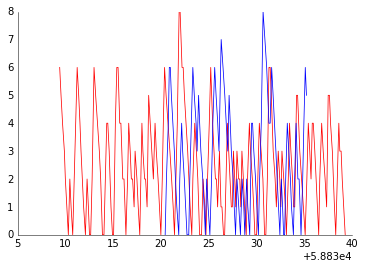

In [17]:
fig,ax = plt.subplots(1)
ppl.plot(ax, [i[0] for i in one[3600:3800]],[i[1] for i in one[3600:3800]])
ppl.plot(ax, [i[0] for i in two[3700:3800]],[i[1] for i in two[3700:3800]])

In [23]:
loader(agent1[0])

{((0, 'pending', 'pending'), 'go_to_sleep'): 112.68411565756227,
 ((0, 'pending', 'running'), 'go_to_sleep'): 116.01397576554234,
 ((0, 'pending', 'sleeping'), 'go_to_sleep'): 134.923117941108,
 ((0, 'running', 'pending'), 'noop'): -66.2,
 ((0, 'running', 'pending'), 'prepare_sleep'): -16.516172401356,
 ((0, 'running', 'running'), 'noop'): -66.76888227231099,
 ((0, 'running', 'running'), 'prepare_sleep'): 21.06819420408069,
 ((0, 'running', 'sleeping'), 'noop'): -75.11836371677092,
 ((0, 'running', 'sleeping'), 'prepare_sleep'): 28.10815873555132,
 ((0, 'sleeping', 'pending'), 'noop'): 166.96236311027062,
 ((0, 'sleeping', 'pending'), 'wakeup'): -12.573728159446887,
 ((0, 'sleeping', 'running'), 'noop'): 228.51751015229064,
 ((0, 'sleeping', 'running'), 'wakeup'): 117.17781204155341,
 ((0, 'sleeping', 'sleeping'), 'noop'): 192.62763868709408,
 ((0, 'sleeping', 'sleeping'), 'wakeup'): 51.23238468050887,
 ((1, 'pending', 'pending'), 'go_to_sleep'): 141.23827431004938,
 ((1, 'pending', 'r